In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
import random

%matplotlib inline

In [2]:
mnist = input_data.read_data_sets('data/MNIST/', one_hot=True)

Extracting data/MNIST/train-images-idx3-ubyte.gz
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [3]:
"""# one hidden layer
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W_hidden1 = tf.Variable(tf.truncated_normal(shape=[784, 256], stddev=0.1))

b_hidden1 = tf.Variable(tf.constant(shape=[256], value=0.1))

W_output = tf.Variable(tf.truncated_normal(shape=[256, 10]))

b_output = tf.Variable(tf.constant(shape=[10], value=[0.1]))
"""

# two hidden layer
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

W_hidden1 = tf.Variable(tf.truncated_normal(shape=[784, 256], stddev=0.1))
b_hidden1 = tf.Variable(tf.constant(shape=[256], value=0.1))

W_hidden2 = tf.Variable(tf.truncated_normal(shape=[256, 128], stddev=0.1))
b_hidden2 = tf.Variable(tf.constant(shape=[128], value=0.1))

W_output = tf.Variable(tf.truncated_normal(shape=[128, 10], stddev=0.1))
b_output = tf.Variable(tf.constant(shape=[10], value=[0.1]))

In [4]:
logit1 = tf.matmul(X, W_hidden1) + b_hidden1
activ1 = tf.nn.sigmoid(logit1)

logit2 = tf.matmul(activ1, W_hidden2) + b_hidden2
activ2 = tf.nn.sigmoid(logit2)

logit3 = tf.matmul(activ2, W_output) + b_output
y_pred = tf.nn.softmax(logit3)

loss = tf.reduce_mean(-tf.reduce_sum(y * tf.log(y_pred), reduction_indices=[1]))

optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

correct_predictions = tf.equal(tf.argmax(y, 1), tf.argmax(y_pred, 1))
accuracy = tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    xs, ys = mnist.train.next_batch(150)
    
    sess.run(optimizer, feed_dict={X: xs, y: ys})
    
    if i % 1000 == 0:
        acc = sess.run(accuracy, feed_dict={X: mnist.test.images,
                                           y: mnist.test.labels})
        print("[*] Step: %d, test accuracy: %.2f%%" % (i, acc * 100))
        

[*] Step: 0, test accuracy: 9.80%
[*] Step: 1000, test accuracy: 81.91%
[*] Step: 2000, test accuracy: 88.20%
[*] Step: 3000, test accuracy: 89.73%
[*] Step: 4000, test accuracy: 90.67%
[*] Step: 5000, test accuracy: 91.31%
[*] Step: 6000, test accuracy: 91.68%
[*] Step: 7000, test accuracy: 91.99%
[*] Step: 8000, test accuracy: 92.41%
[*] Step: 9000, test accuracy: 92.58%


In [6]:
def show_digit(pixels):
    img = pixels.reshape(28, 28)
    plt.axis('off')
    plt.imshow(img, cmap='gray_r')

Probability of being 0: 2.08%
Probability of being 1: 0.00%
Probability of being 2: 0.08%
Probability of being 3: 0.00%
Probability of being 4: 0.00%
Probability of being 5: 97.35%
Probability of being 6: 0.04%
Probability of being 7: 0.00%
Probability of being 8: 0.43%
Probability of being 9: 0.00%


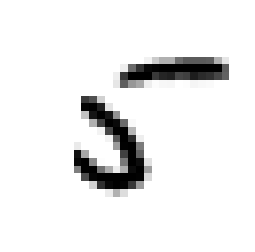

In [20]:
sample = random.choice(mnist.test.images)

predict = sess.run(y_pred, feed_dict={X: [sample]})[0]

for i, v in enumerate(predict):
    print("Probability of being %d: %.2f%%" % (i, v * 100))
    
show_digit(sample)

Probability of being 0: 38.81%
Probability of being 1: 0.00%
Probability of being 2: 30.87%
Probability of being 3: 12.99%
Probability of being 4: 0.00%
Probability of being 5: 12.96%
Probability of being 6: 0.19%
Probability of being 7: 0.01%
Probability of being 8: 4.18%
Probability of being 9: 0.00%


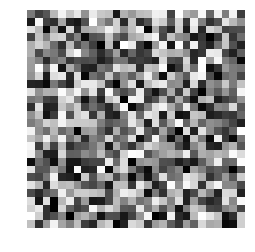

In [22]:
random_img = np.random.rand(784)

predict = sess.run(y_pred, feed_dict={X: [random_img]})[0]

for i, v in enumerate(predict):
    print("Probability of being %d: %.2f%%" % (i, v * 100))
    
show_digit(random_img)